In [1]:
import sys
travel_up = '../'
sys.path.append(travel_up)

In [2]:
import glob
# import nibabel as nib
import numpy as np
import os
import pandas as pd
import plotly.graph_objects as go
# import pydicom
import re

import matplotlib.pyplot as plt
from matplotlib import cm

from pathlib import Path

https://github.com/xf4j/aapm_thoracic_challenge

In [3]:
home = Path('/home/h/hardisty/evandros/spine-mets')

In [4]:
root = Path('/scratch/h/hardisty')

In [5]:
! ls {root}

abbasaaz  evandros  fullerkj  hardisty


### 0. Create DataFrame of Patient Directory

In [6]:
columns = ['old_pids', 'new_pids', 'SBRT', 'GTV', 'empty', 'exists', 'pid']
df = pd.read_csv(home/'metadata/spine_mets.csv', names=columns, index_col=False)
df.tail()

old_pids  \
88  017d6fa6e0cdee9f57f1cda1d571d096def2cb54148a2e...   
89  6c1c945f6c853bbb464416991ca5234e45fe2f1174d2ff...   
90  6fc1af26c20d9cee503bc8b72a7d1ef6aa913d2b85c762...   
91  1e8c5bbb80a499fc4d68a0863ba30563e9ac68d342627d...   
92  a20fc151a638e9ccd02decc941bc5f4c1addd337439e3d...   

                                          new_pids  SBRT  GTV empty exists  \
88  OE4TY-MMQRU-V1BH1-8IS6DIDDZO-0JG0S-1YR4W-PDZ8X  SBRT  Yes   NaN    Yes   
89  1D5WF-QPIM0-2A7GX-85O3SNUM6I-MDL1M-MRNCV-5AMAW  SBRT  Yes   NaN    Yes   
90  1ETKL-ZUPB7-896WT-6QHE5WAOK5-7ZD40-ZDPY5-NLD3W  SBRT  Yes   NaN    Yes   
91  DW3V3-KFEC3-0WN59-JQTRSOVTEV-QZRCQ-H78TN-PQWY4  SBRT  Yes   NaN    Yes   
92  21P48-FFJAZ-8QS5C-4ZFZ970P4E-RMUS9-W217B-AMX7P  SBRT  Yes   NaN    Yes   

                                                  pid  
88  SHSC-OE4TY-MMQRU-V1BH1-8IS6DIDDZO-0JG0S-1YR4W-...  
89  SHSC-1D5WF-QPIM0-2A7GX-85O3SNUM6I-MDL1M-MRNCV-...  
90  SHSC-1ETKL-ZUPB7-896WT-6QHE5WAOK5-7ZD40-ZDPY5-...  
91  SHSC-DW3V3-KFEC3-0WN59-JQTRSOVTEV-QZRCQ-H78TN-...  
92  SHSC-21P48-FFJAZ-8QS5C-4ZFZ970P4E-RMUS9-W217B-...

In [7]:
def get_pid(path):
    return path.split('/')[-5]

def get_year(path):
    return path.split('/')[-4]

def get_study(path):
    return path.split('/')[-3]

def get_series(path):
    return path.split('/')[-2]

def get_modality(path):
    return path.split('/')[-1]

def get_root(path):
    return path.split('/')[5]

odette/{pid}/{year}/{study}/{series}/modality/dcms

In [8]:
roots = []
pids = []
years = []
studies = []
series = []
modalities = []

MODALITIES = ['RTSTRUCT', 'CT', 'MR', 'REG'] # modalities interested in

for _, row in df.iterrows():
    pid = row['pid']
    pid_path = glob.glob(f'{root}/fullerkj/*/{pid}/*/*/*/*')
    for f in pid_path:
        modality = get_modality(f)
        if modality in MODALITIES:
            modalities.append(get_modality(f))
            
            roots.append(get_root(f))
            pids.append(get_pid(f))
            years.append(get_year(f))
            studies.append(get_study(f))
            series.append(get_series(f))

In [9]:
len(roots), len(pids), len(years), len(studies), len(series), len(modalities)

(739, 739, 739, 739, 739, 739)

In [10]:
roots = ['incomingOdette' for _ in range(len(pids))]
data = {'parent': roots,
        'pid': pids,
        'year': years,
        'study': studies,
        'series': series,
        'modality': modalities}

gtv_df = pd.DataFrame(data)
gtv_df.head()

parent                                                pid  \
0  incomingOdette  SHSC-16MY6-HRAOH-FUX4I-L68UX6NEQ2-9K1MH-KU7Y7-...   
1  incomingOdette  SHSC-16MY6-HRAOH-FUX4I-L68UX6NEQ2-9K1MH-KU7Y7-...   
2  incomingOdette  SHSC-16MY6-HRAOH-FUX4I-L68UX6NEQ2-9K1MH-KU7Y7-...   
3  incomingOdette  SHSC-16MY6-HRAOH-FUX4I-L68UX6NEQ2-9K1MH-KU7Y7-...   
4  incomingOdette  SHSC-16MY6-HRAOH-FUX4I-L68UX6NEQ2-9K1MH-KU7Y7-...   

       year                                   study  \
0  20160201   1.2.840.11370.1.111.3616.1454344031.9   
1  20160201  1.2.840.113704.1.111.3616.1454344031.9   
2  20160201  1.2.840.113704.1.111.3616.1454344031.9   
3  20160201  1.2.840.113704.1.111.3616.1454344031.9   
4  20160201  1.2.840.113704.1.111.3616.1454344031.9   

                                              series  modality  
0             1.2.840.11370.1.111.5496.1454346199.11        CT  
1  2.16.840.1.11366.2.931128.4874699.202104291736...  RTSTRUCT  
2  2.16.840.1.11366.2.931128.4874699.202104291736...       REG  
3  2.16.840.1.11366.2.931128.4874699.202103191422...       REG  
4  2.16.840.1.11366.2.931128.4874699.202103191422...  RTSTRUCT

### 1. Analysis of RTSTRUCT ROIs

In [15]:
from rtstruct.preprocess.rtstruct_utilities import load_rtstruct

In [16]:
regions = []
num_regions = []
all_regions = set()

rtstruct_df = gtv_df[gtv_df['modality']=='RTSTRUCT']

for _, row in rtstruct_df.iterrows():
    ds = load_rtstruct(root, row)
    
    rois = ds.StructureSetROISequence
        
    roi = []
    num_rois = len(rois)
    num_regions.append(num_rois)
    
    for num in range(num_rois):
        region = rois[num].ROIName
        roi.append(region)
        all_regions.add(region)
    
    regions.append(roi)

In [17]:
r = [item for sublist in regions for item in sublist]
data = {}

for region in r:
    data[region] = data.get(region, 0) + 1
df_regions = pd.DataFrame(data, index=[0])

In [18]:
data['GTV'], data['CTV'], data['PTV']

(59, 70, 127)

In [19]:
region = list(data.keys())
values = list(data.values())

fig = go.Figure(data=[
    go.Bar(name='ROI Names', x=region, y=values),
])

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

### 2. Helper Functions to Read MRs (optional)

In [16]:
from rtstruct.preprocess.mr_utilities import load_mr, process_mr

In [17]:
mr_row = gtv_df[gtv_df['modality']=='MR'][:1].squeeze()
mr_slices = load_mr(root, mr_row)
mr = process_mr(mr_slices)

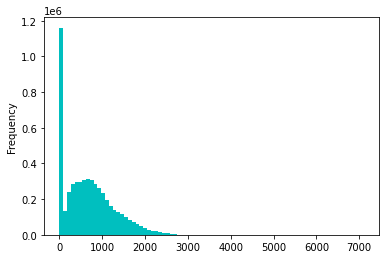

In [18]:
plt.hist(mr.flatten(), bins=80, color='c')
plt.xlabel("")
plt.ylabel("Frequency")
plt.show()

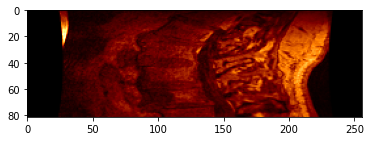

In [19]:
plt.imshow(mr[...,128], cmap='afmhot')

### 3. Helper Functions to Read CTs

In [20]:
from rtstruct.preprocess.ct_utilities import load_ct, process_ct
from rtstruct.preprocess.ct_utilities import get_ct_from_rtstruct, get_ct_patient_id, \
                                          get_ct_slice_thickness, get_ct_patient_position, \
                                          get_ct_pixel_spacing

### 3.b Plot CT Scan

In [21]:
rt_row = gtv_df[gtv_df['modality']=='RTSTRUCT'][2:3].squeeze()
rt = load_rtstruct(root, rt_row)

In [22]:
ct_slices = get_ct_from_rtstruct(root, rt, gtv_df)
ct = process_ct(ct_slices)

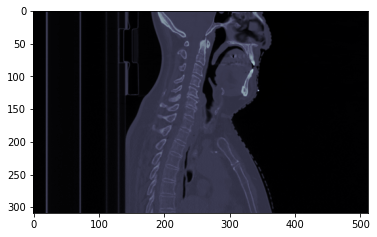

In [23]:
plt.imshow(np.flip(ct[...,256]), cmap='bone')

In [24]:
print("Series Instance UID: " + str(ct_slices[0].SeriesInstanceUID) + "\n")
print("Study Instance UID: " + str(ct_slices[0].StudyInstanceUID) + "\n")
print("Time of Scan: " + str(ct_slices[0].StudyDate) + "\n")
print("Slice Thickness: " + str(ct_slices[0].SliceThickness) + "\n")
print("Slice Pixel Spacing: " + str(ct_slices[0].PixelSpacing) + "\n")
print("Number of Slices: " + str(len(ct)) + "\n")
print("Patient Position: " + str(ct_slices[0].ImagePositionPatient) + "\n")

Series Instance UID: 1.2.840.11370.1.111.7400.1465217298.12

Study Instance UID: 1.2.840.11370.1.111.5936.1465217220.8

Time of Scan: 20160606

Slice Thickness: 1.00

Slice Pixel Spacing: [1.171875, 1.171875]

Number of Slices: 309

Patient Position: [-300, -217, -854]



### 4. Helper Functions to Process RSTRUCTs

In [25]:
from rtstruct.preprocess.rtstruct_utilities import process_rtstruct, convert_rtstruct_to_mask

In [26]:
rt_row = gtv_df[gtv_df['modality']=='RTSTRUCT'][53:54].squeeze()
rt = load_rtstruct(root, rt_row)

ct_slices = get_ct_from_rtstruct(root, rt, gtv_df)
ct = process_ct(ct_slices)

patient_position = get_ct_patient_position(ct_slices)
slice_thickness = get_ct_slice_thickness(ct_slices)
pixel_spacing = get_ct_pixel_spacing(ct_slices)

contours = process_rtstruct(rt)
cnames = [c['name'] for c in contours]
print(cnames)
contours = list(filter(lambda contour: contour['name'].casefold() == 'gtv_t1', contours))

mask = convert_rtstruct_to_mask(contours, ct.shape, ct_slices)

['ct iso', 'beads', 'tx iso', 'dp', 'GTV_T1', 'CTV_T1', 'PTV_T1', 'CORD', 'CORDprv', 'ESOPHAGUS', 'tabletop', 'External ROI_1', 'refC7', 'Lung_LT', 'Lung_RT', 'trachea', 'cord prv+4', 'ptv+2', 'eso+2', 'tra+2', 'ring1', 'ring2', 'opti ptv', 'ex', 'tissue', 'ds ptv', 'ds in lung', 'ds left', 'unspecified tissue']


In [27]:
np.where(mask!=0)

(array([115, 115, 115, ..., 147, 147, 147]),
 array([262, 262, 262, ..., 266, 266, 266]),
 array([233, 234, 235, ..., 241, 242, 243]))

In [28]:
mask.shape

(296, 512, 512)

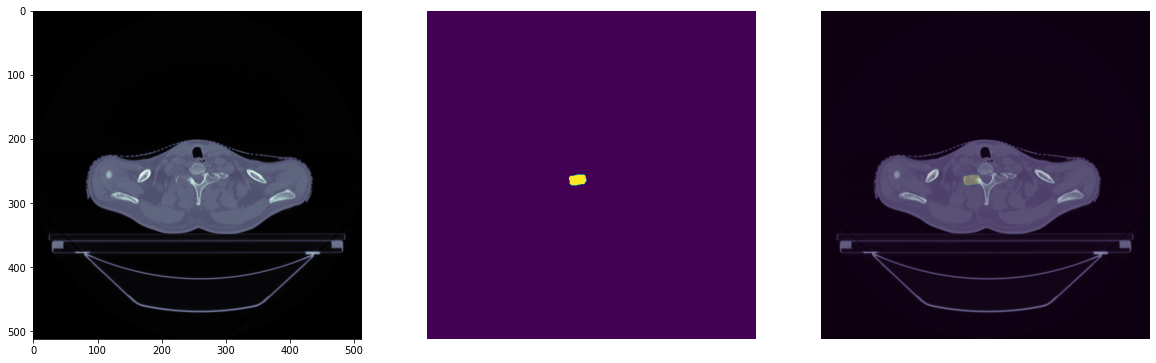

In [29]:
crop_ct = ct[130, ...]
crop_mask = mask[130, ...]

f, axs = plt.subplots(1, 3, figsize=(20,20))
axs[0].imshow(crop_ct, cmap='bone')
# axs[0].axis('off')
axs[1].imshow(crop_mask)
axs[1].axis('off')
axs[2].imshow(crop_ct, cmap='bone')
axs[2].imshow(crop_mask, alpha=0.2)
axs[2].axis('off')
f.show()

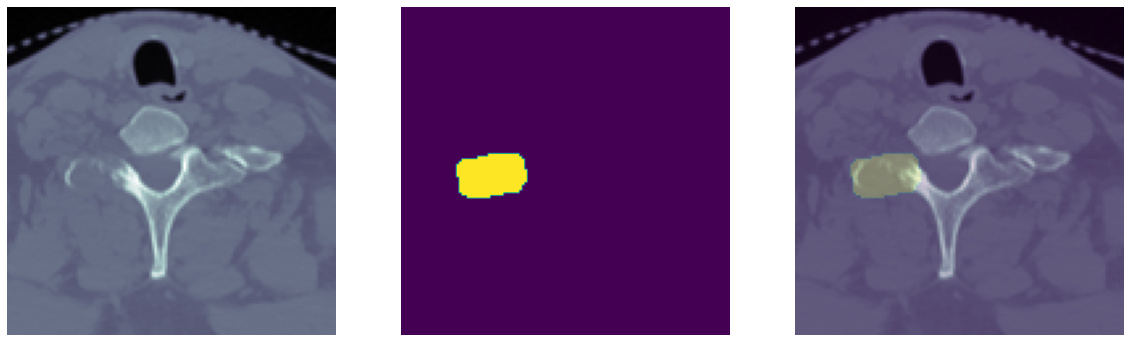

In [30]:
crop_ct = ct[130, 200:325, 200:325]
crop_mask = mask[130, 200:325, 200:325]

# crop_ct = ct[110, ...]
# crop_mask = mask[110, ...]

f, axs = plt.subplots(1, 3, figsize=(20,20))
axs[0].imshow(crop_ct, cmap='bone')
axs[0].axis('off')
axs[1].imshow(crop_mask)
axs[1].axis('off')
axs[2].imshow(crop_ct, cmap='bone')
axs[2].imshow(crop_mask, alpha=0.2)
axs[2].axis('off')
f.show()

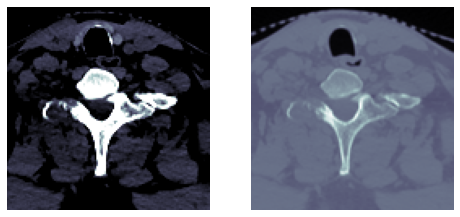

In [31]:
norm = plt.Normalize()

m3 = cm.bone(crop_ct)
m4 = cm.bone(norm(crop_ct))

f, axs = plt.subplots(1,2, figsize=(8,8))
axs[0].imshow(m3)
axs[0].axis('off')
axs[1].imshow(m4)
axs[1].axis('off')
f.show()

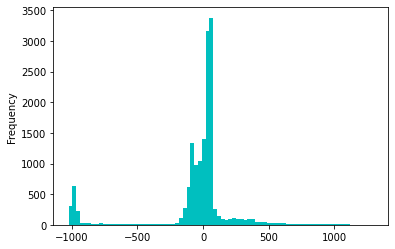

In [32]:
plt.hist(crop_ct.flatten(), bins=80, color='c')
plt.xlabel("")
plt.ylabel("Frequency")
plt.show()

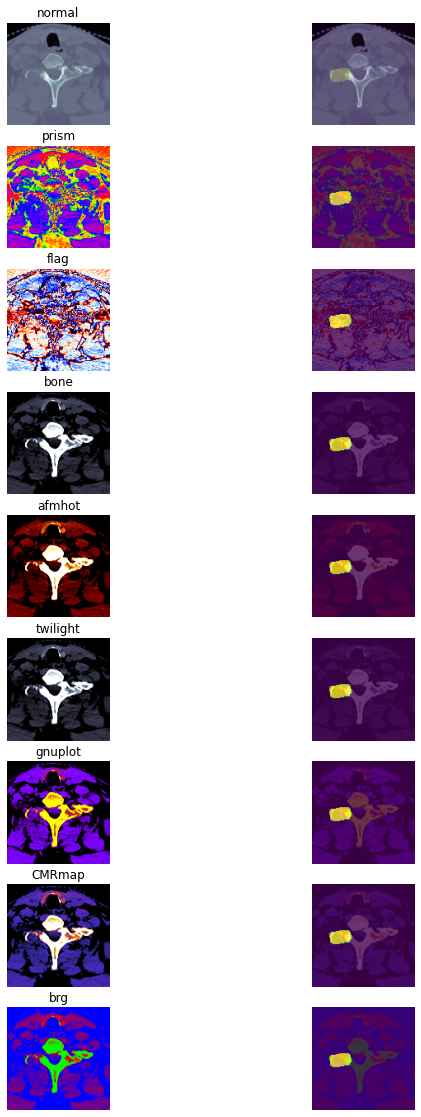

In [33]:
f, axs = plt.subplots(9, 2, figsize=(10, 20))
normal = cm.bone(norm(crop_ct))
prism = cm.prism(norm(crop_ct))
flag = cm.flag(norm(crop_ct))
bone = cm.bone(crop_ct)
afmhot = cm.afmhot(crop_ct)
twilight = cm.bone(crop_ct)
gnuplot = cm.gnuplot(crop_ct)
CMRmap = cm.CMRmap(crop_ct)
brg = cm.brg(crop_ct)

axs[0,0].title.set_text('normal')
axs[0,0].imshow(normal)
axs[0,1].imshow(normal)
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[0,1].imshow(crop_mask, alpha=0.2)

axs[1,0].title.set_text('prism')
axs[1,0].imshow(prism)
axs[1,1].imshow(prism)
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[1,1].imshow(crop_mask, alpha=0.8)

axs[2,0].title.set_text('flag')
axs[2,0].imshow(flag)
axs[2,1].imshow(flag)
axs[2,0].axis('off')
axs[2,1].axis('off')
axs[2,1].imshow(crop_mask, alpha=0.8)

axs[3,0].title.set_text('bone')
axs[3,0].imshow(bone)
axs[3,1].imshow(bone)
axs[3,0].axis('off')
axs[3,1].axis('off')
axs[3,1].imshow(crop_mask, alpha=0.8)

axs[4,0].title.set_text('afmhot')
axs[4,0].imshow(afmhot)
axs[4,1].imshow(afmhot)
axs[4,0].axis('off')
axs[4,1].axis('off')
axs[4,1].imshow(crop_mask, alpha=0.8)

axs[5,0].title.set_text('twilight')
axs[5,0].imshow(twilight)
axs[5,1].imshow(twilight)
axs[5,0].axis('off')
axs[5,1].axis('off')
axs[5,1].imshow(crop_mask, alpha=0.8)

axs[6,0].title.set_text('gnuplot')
axs[6,0].imshow(gnuplot)
axs[6,1].imshow(gnuplot)
axs[6,0].axis('off')
axs[6,1].axis('off')
axs[6,1].imshow(crop_mask, alpha=0.8)

axs[7,0].title.set_text('CMRmap')
axs[7,0].imshow(CMRmap)
axs[7,1].imshow(CMRmap)
axs[7,0].axis('off')
axs[7,1].axis('off')
axs[7,1].imshow(crop_mask, alpha=0.8)

axs[8,0].title.set_text('brg')
axs[8,0].imshow(brg)
axs[8,1].imshow(brg)
axs[8,0].axis('off')
axs[8,1].axis('off')
axs[8,1].imshow(crop_mask, alpha=0.8)

f.show()

color maps for tumors
- prism
- flag
- bone (no norm)
- afmhot (no norm)
- twilight (no norm)
- gnuplot (no norm)
- CMRmap (no norm)
- brg (no norm)

### 5. Save RTSTRUCT GTV

In [34]:
from rtstruct.preprocess.preprocess_rtstruct import get_mask, get_save_location, save_mask, save_metadata

In [35]:
contour_type = 'ptv'

In [66]:
%%time
rt_df = gtv_df[gtv_df['modality']=='RTSTRUCT']

for i, row in rt_df.iterrows():
    try:
        mask = get_mask(row, gtv_df)
        if mask != 'bad':
            print(f"Saving: {row['pid']}, {i}")
#             save_mask(row, mask)
            save_metadata(row, gtv_df)
    except:
        print(f"{row['pid']}, {i}")

<timed exec>:6: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Saving: SHSC-16MY6-HRAOH-FUX4I-L68UX6NEQ2-9K1MH-KU7Y7-SEUGN, 6
Saving: SHSC-16MY6-HRAOH-FUX4I-L68UX6NEQ2-9K1MH-KU7Y7-SEUGN, 9
Saving: SHSC-9IKXI-JDZIC-MYDND-T0YEVBV5CK-6DUP5-XXDR7-GL231, 112
Saving: SHSC-1NW8V-X5SR0-BM7WV-H79UHS0OPF-JQLUJ-J6ZFI-GIV59, 138
Saving: SHSC-7XZ4R-Q1PLK-59H1W-WAV5MR3DDJ-28MQD-54398-7KEB9, 187
Saving: SHSC-2Z5XY-G4P0N-NXQYO-INFTOBWBKP-6F5IV-K9II2-A1I5Q, 265
Saving: SHSC-36J28-G5Y5A-222G6-ELZIIXDMZZ-MI1CE-120S5-B9K4K, 284
Saving: SHSC-2T4S5-YJ0XN-8R49N-O1MQTXIXWY-QLICZ-M89PI-99DS5, 406
Saving: SHSC-2T4S5-YJ0XN-8R49N-O1MQTXIXWY-QLICZ-M89PI-99DS5, 408
Saving: SHSC-2P93O-IMUI9-NPC6V-D6BSJTE64O-W9D7C-3V2Q2-CNHQV, 462
Saving: SHSC-2P93O-IMUI9-NPC6V-D6BSJTE64O-W9D7C-3V2Q2-CNHQV, 467
Saving: SHSC-2P93O-IMUI9-NPC6V-D6BSJTE64O-W9D7C-3V2Q2-CNHQV, 471
Saving: SHSC-2P93O-IMUI9-NPC6V-D6BSJTE64O-W9D7C-3V2Q2-CNHQV, 474
Saving: SHSC-24HAS-VDXIY-CB9TT-EBHR6Q1XW9-IFSU4-UY1SJ-APJUJ, 498
Saving: SHSC-24HAS-VDXIY-CB9TT-EBHR6Q1XW9-IFSU4-UY1SJ-APJUJ, 500
Saving: SHSC-24HAS-VDXIY-CB9T

In [41]:
saved = glob.glob(f'{root}/evandros/processedOdette/*/*/*/*/*/{contour_type}.nii.gz')
len(saved)

82

In [36]:
saved = glob.glob(f'{root}/evandros/processedOdette/*/*/*/*/*/metadata.txt')
len(saved)

85

36